# Ejercicio 2 (Puntos extra): 
Resolver ecuación de Poisson unidimensional con $\rho (x)=\cos(x)$, en el dominio $[0,2 \pi]$, utilizando una malla con 12 puntos. Aquí nuevamente hay 10 incognitas, sin embargo note que para el método es mas conveniente definir $\vec f$ incluyendo las condiciones de frontera.

In [34]:
using SymPy
using PyPlot

Para una malla de 12 puntos, tenemos que  cada punto estará separado por $h=\frac{2\pi}{11}$

In [35]:
h=2*pi/11
malla=linspace(0,2pi,12)
ptosm=[]
A=[]
for i in 2:11
    r=f[i+1]+f[i-1]-2f[i]-h*cos(malla[i])
    push!(ptosm,r)
end

for i in 1:10
    bP=ptosm[i](f_1=>0,f_2=>0,f_3=>0,f_4=>0,f_5=>0,f_6=>0,f_7=>0,f_8=>0,f_9=>0,f_10=>0)
    push!(A,bP)
end

In [36]:
ptosm

10-element Array{Any,1}:
       -2*f_1 + f_2 - 0.480522894281618
  f_1 - 2*f_2 + f_3 - 0.237284500552297
  f_2 - 2*f_3 + f_4 + 0.081290045530213
  f_3 - 2*f_4 + f_5 + 0.374055576524896
  f_4 - 2*f_5 + f_6 + 0.548061104923333
  f_5 - 2*f_6 + f_7 + 0.548061104923333
  f_6 - 2*f_7 + f_8 + 0.374055576524896
 f_7 - 2*f_8 + f_9 + 0.0812900455302132
 f_10 + f_8 - 2*f_9 - 0.237284500552297
      -2*f_10 + f_9 - 0.480522894281618

In [37]:
matriz= [-2 1 0 0 0 0 0 0 0 0; 1 -2 1 0 0 0 0 0 0 0; 0 1 -2 1 0 0 0 0 0 0 ; 0 0 1 -2 1 0 0 0 0 0 ; 0 0 0 1 -2 1 0 0 0 0 ; 0 0 0 0 1 -2 1 0 0 0 ; 0 0 0 0 0 1 -2 1 0 0 ; 0 0 0 0 0 0 1 -2 1 0 ; 0 0 0 0 0 0 0 1 -2 1 ; 0 0 0 0 0 0 0 0 1 -2]

10×10 Array{Int64,2}:
 -2   1   0   0   0   0   0   0   0   0
  1  -2   1   0   0   0   0   0   0   0
  0   1  -2   1   0   0   0   0   0   0
  0   0   1  -2   1   0   0   0   0   0
  0   0   0   1  -2   1   0   0   0   0
  0   0   0   0   1  -2   1   0   0   0
  0   0   0   0   0   1  -2   1   0   0
  0   0   0   0   0   0   1  -2   1   0
  0   0   0   0   0   0   0   1  -2   1
  0   0   0   0   0   0   0   0   1  -2

In [38]:
A

10-element Array{Any,1}:
 -0.480522894281618
 -0.237284500552297
 0.0812900455302130
  0.374055576524896
  0.548061104923333
  0.548061104923333
  0.374055576524896
 0.0812900455302132
 -0.237284500552297
 -0.480522894281618

In [39]:
m2=inv(matriz)

10×10 Array{Float64,2}:
 -0.909091   -0.818182  -0.727273  …  -0.272727  -0.181818  -0.0909091
 -0.818182   -1.63636   -1.45455      -0.545455  -0.363636  -0.181818 
 -0.727273   -1.45455   -2.18182      -0.818182  -0.545455  -0.272727 
 -0.636364   -1.27273   -1.90909      -1.09091   -0.727273  -0.363636 
 -0.545455   -1.09091   -1.63636      -1.36364   -0.909091  -0.454545 
 -0.454545   -0.909091  -1.36364   …  -1.63636   -1.09091   -0.545455 
 -0.363636   -0.727273  -1.09091      -1.90909   -1.27273   -0.636364 
 -0.272727   -0.545455  -0.818182     -2.18182   -1.45455   -0.727273 
 -0.181818   -0.363636  -0.545455     -1.45455   -1.63636   -0.818182 
 -0.0909091  -0.181818  -0.272727     -0.727273  -0.818182  -0.909091 

In [40]:
solucion=Float64.(-m2*A)

10-element Array{Float64,1}:
 0.285599
 1.05172 
 2.05513 
 2.97724 
 3.52531 
 3.52531 
 2.97724 
 2.05513 
 1.05172 
 0.285599

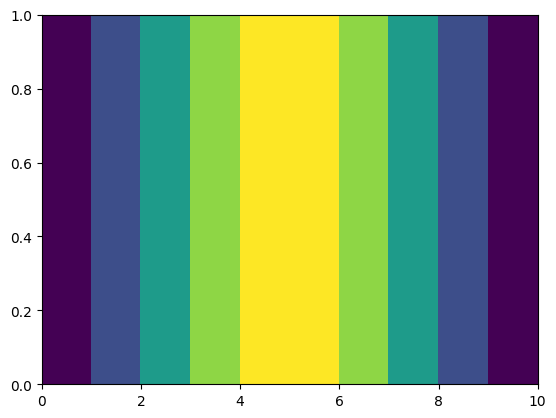

PyObject <matplotlib.collections.QuadMesh object at 0x7fa842fbd090>

In [41]:
Poisson=reshape(solucion,(1,10))
pcolormesh(Poisson)

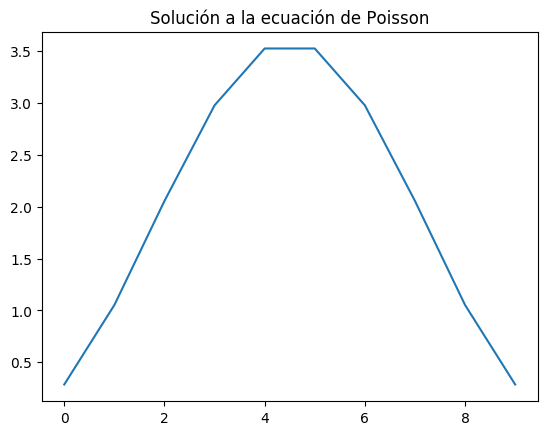

PyObject <matplotlib.text.Text object at 0x7fa842f8cb90>

In [42]:
plot(solucion)
title("Solución a la ecuación de Poisson")